<a href="https://colab.research.google.com/github/defoxtrotalpha/atomcamp/blob/master/Week%207/CNN_Mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [2]:
x_train.shape

(60000, 28, 28)

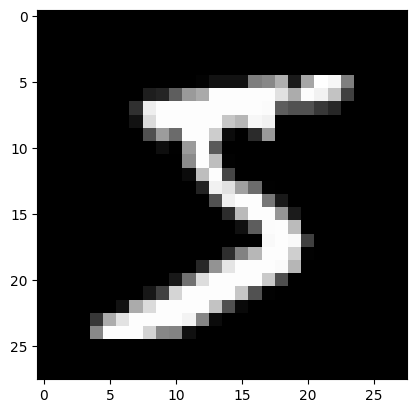

In [3]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0], cmap='gray')
plt.show()

In [4]:
# Reshape the data to fit the model (include color channel)
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [5]:
# Normalize the data
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [10]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [11]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

model = Sequential()

# First convolutional layer
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))

# Second convolutional layer
model.add(Conv2D(64, (3, 3), activation='relu'))

# Max pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# Dropout layer to prevent overfitting
model.add(tf.keras.layers.Dropout(0.25))

# Flatten the data to a 1D vector
model.add(Flatten())

# Fully connected layer
model.add(Dense(128, activation='relu'))

# Another dropout layer
model.add(tf.keras.layers.Dropout(0.5))

# Output layer
model.add(Dense(10, activation='softmax'))

In [12]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [13]:
model.fit(x_train, y_train,
          batch_size=128,
          epochs=12,
          verbose=1,
          validation_data=(x_test, y_test))

Epoch 1/12
469/469 [==============================] - 10s 10ms/step - loss: 0.2301 - accuracy: 0.9306 - val_loss: 0.0512 - val_accuracy: 0.9826
Epoch 2/12
469/469 [==============================] - 4s 9ms/step - loss: 0.0816 - accuracy: 0.9761 - val_loss: 0.0458 - val_accuracy: 0.9855
Epoch 3/12
469/469 [==============================] - 4s 9ms/step - loss: 0.0626 - accuracy: 0.9807 - val_loss: 0.0373 - val_accuracy: 0.9875
Epoch 4/12
469/469 [==============================] - 4s 9ms/step - loss: 0.0503 - accuracy: 0.9845 - val_loss: 0.0312 - val_accuracy: 0.9897
Epoch 5/12
469/469 [==============================] - 4s 9ms/step - loss: 0.0437 - accuracy: 0.9864 - val_loss: 0.0299 - val_accuracy: 0.9902
Epoch 6/12
469/469 [==============================] - 4s 9ms/step - loss: 0.0393 - accuracy: 0.9871 - val_loss: 0.0289 - val_accuracy: 0.9909
Epoch 7/12
469/469 [==============================] - 4s 9ms/step - loss: 0.0341 - accuracy: 0.9890 - val_loss: 0.0275 - val_accuracy: 0.9917
Epoc

In [14]:
# Evaluate the model
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.027897454798221588
Test accuracy: 0.9921000003814697


In [15]:
# Save the model
model.save('mnist_cnn_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [28]:
import numpy as np

predictions = model.predict(x_test)
# Convert predictions and ground truth from one-hot encoded to integer labels
predicted_labels = np.argmax(predictions, axis=1)
true_labels = [np.argmax(x) for x in y_test]

313/313 [==============================] - 1s 2ms/step


In [29]:
print(true_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 9, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 4, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 2, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

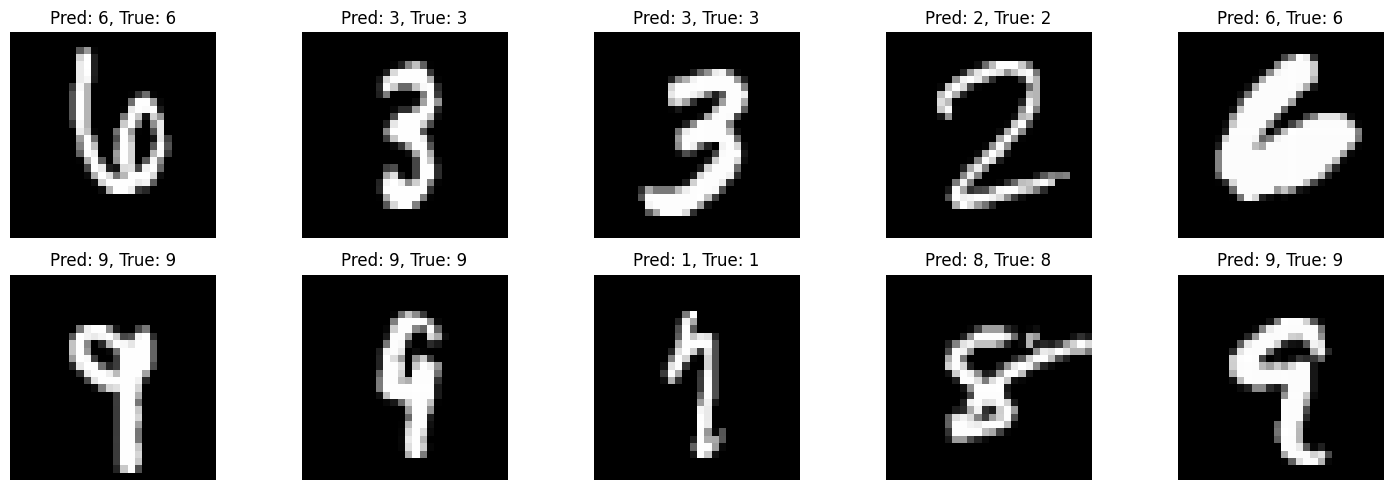

In [30]:
# Number of images to display
num_images = 10

# Create a figure
plt.figure(figsize=(15, 5))

for i in range(num_images):
    # Select a random test image
    idx = np.random.randint(0, len(x_test))

    # Get the image, prediction, and true label
    img = x_test[idx].reshape(28, 28)
    pred_label = predicted_labels[idx]
    true_label = true_labels[idx]

    # Plot the image
    plt.subplot(2, num_images//2, i+1)
    plt.imshow(img, cmap='gray')
    plt.title(f"Pred: {pred_label}, True: {true_label}")
    plt.axis('off')

plt.tight_layout()
plt.show()